This is to create visualization of vectors in the module.

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/var/folders/sb/rscyryt53fs5t_zbvkxgpzjc0000gn/T/ipykernel_34531/235752236.py:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequenc

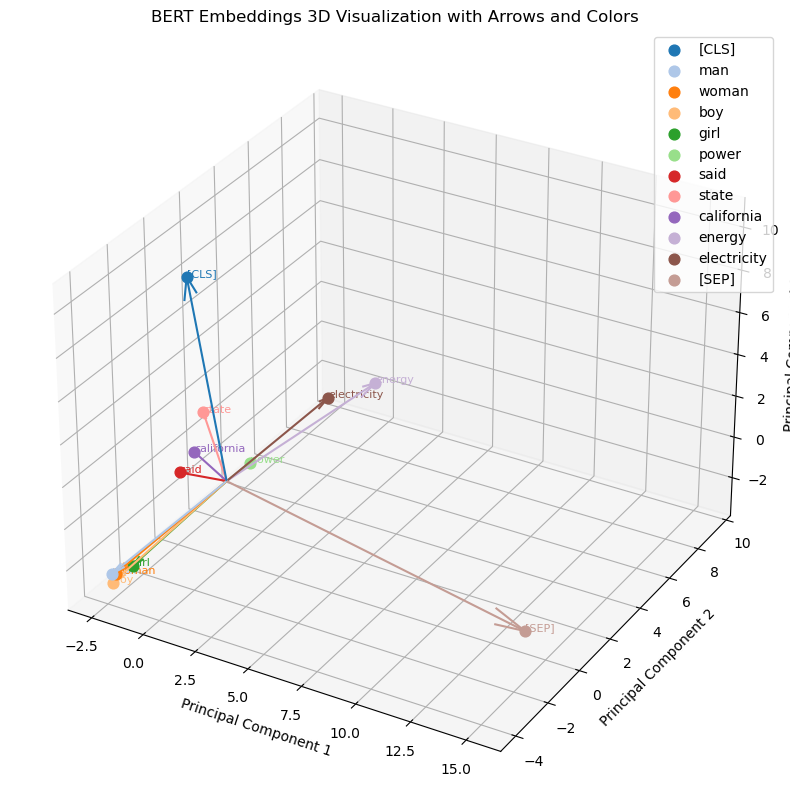

In [ ]:
from transformers import AutoTokenizer, AutoModel
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle

text = 'man woman boy girl power said state california energy electricity'

# Load the pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Tokenize the text
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

# Forward pass through the model to get embeddings
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state

# Reshape the embeddings
embeddings_array = embeddings[0].numpy()  # Extract embeddings for the first (and only) input
num_tokens, embedding_dim = embeddings_array.shape
reshaped_embeddings = embeddings_array.reshape(num_tokens, -1)

# Perform PCA for dimensionality reduction to 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(reshaped_embeddings)

# Get the tokens from the original input text
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0].tolist())

# Generate a unique color for each token
colors = cycle(plt.cm.tab20(np.arange(len(tokens)) % 20))

# Visualize PCA results with arrows in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

for i, token in enumerate(tokens):
    x, y, z = pca_result[i, 0], pca_result[i, 1], pca_result[i, 2]
    color = next(colors)
    ax.scatter(x, y, z, label=token, c=color, s=60)  # Scatter point with label and color
    ax.text(x, y, z, token, fontsize=8, color=color)  # Label each point

    # Add arrows from origin to each point
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.1)

ax.set_title("BERT Embeddings 3D Visualization with Arrows and Colors")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.grid()
plt.show()

In [2]:
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModel
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

# Load the pre-trained BERT model and tokenizer
model_name = "meta-llama/Llama-2-7b-hf"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Specify a custom padding token (e.g., [PAD]) if the model doesn't have one
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

model = AutoModel.from_pretrained(model_name)

# Tokenize the text
text = 'man woman boy girl power said state california energy electricity'
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

# Forward pass through the model to get embeddings
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state

# Reshape the embeddings
embeddings_array = embeddings[0].numpy()  # Extract embeddings for the first (and only) input
num_tokens, embedding_dim = embeddings_array.shape
reshaped_embeddings = embeddings_array.reshape(num_tokens, -1)

# Perform PCA for dimensionality reduction to 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(reshaped_embeddings)

# Get the tokens from the original input text
tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0].tolist())

# Ensure num_samples does not exceed the number of tokens
num_samples = min(50, len(tokens))  # Change this to the number of embeddings you want to visualize

# Randomly select a subset of embeddings for visualization
selected_indices = random.sample(range(len(pca_result)), num_samples)
selected_pca_result = pca_result[selected_indices]
selected_tokens = [tokens[i] for i in selected_indices]

# Generate a unique color for each token
colors = cycle(plt.cm.tab20(np.arange(len(selected_tokens)) % 20))

# Visualize PCA results with arrows in 3D for the selected subset
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for i, token in enumerate(selected_tokens):
    x, y, z = selected_pca_result[i, 0], selected_pca_result[i, 1], selected_pca_result[i, 2]
    color = next(colors)
    ax.scatter(x, y, z, label=token, c=color, s=60)
    ax.text(x, y, z, token, fontsize=8, color=color)
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.1)

ax.set_title("BERT Embeddings 3D Visualization with Arrows and Colors (Subset)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.grid()
plt.show()


: 